## Workshop notebooks

When working on your solution, you can save your notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.


The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code where it says 'YOUR CODE HERE' and delete or comment out the 'raise NotImplementedError()' statements. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).


## Workshop I: Radioactive decay

In this exercise we will solve numerically the equation for radioactive decay of isotope A to isotope B and compare the numerical result to its analytical counterpart. We will use Euler's method.

As a second step we will generalize the solver to deal with three elements, where isotope A decays to isotope B and isotope B decays to isotope C. 

Total marks for this assignment is 10.

Note:
  - simply add numerical value in a dropbox for it to get marked
  
  - when asked for true/false in a box: 
      - ticking a box means True
      - not ticking (or ticking an even number of times) yields False 



In [12]:
%matplotlib inline
import numpy
import pylab
import sys
import os
from DEq_Solver import DEq_Solver
sys.path.append(os.getcwd())

## Euler's method

Euler's method for solving the first order DE


$\frac{{\rm d}x}{{\rm d}t} = f(x,t)$

is

$x^{n+1} = x^{n} + f(x^n,t^n)\,\Delta t$.

We begin by implementing a routine, ``makeStep``, that implements this time integration, and test it in the special case where
$f(x,t)$ is a constant.



This is where we define the Euler solver. The class Euler Solver below is derived from the more general DEq_Solver class (see DEq_Solver.py in the same directory). This means that the resulting EulerSolver class features all the methods defined in DEq_Solver as well as the additional EulerSolver methods which you are supposed to complete below. 

Implement the makeStep(self) function. Within this function you have access to 

- the current coordinates array as ``self.x``
- the current time as ``self.t``
- the derivative $dx/dt$ as ``self.kernel.dx_dt(self.x,self.t)``
- the timestep as ``self.delta_t``

the function ``makeStep`` has to update ``self.x`` and ``self.t``.
 
**3 marks** 

In [13]:
class EulerSolver(DEq_Solver):
    def __init__(self,kernel):
        self.kernel  = kernel
    def makeStep(self):
        self.t += self.delta_t
        self.x += self.kernel.dx_dt(self.x,self.t)*self.delta_t


These two cells test your implementation of the ``makeStep`` routine.

In [14]:
class ConstantSpeedKernel:
    def dx_dt(x,t):
        return 2.3
d=EulerSolver(ConstantSpeedKernel)
x0=numpy.array([0.0])
t0=0
t1=10
delta_t=0.1
d.initialise(x0,t0,t1,delta_t)

# test 20 steps
for i in range(20):
    d.makeStep()
assert numpy.isclose(d.x,numpy.array([ 4.6]))

In [15]:
class testKernel:
    def dx_dt(x,t):
        return sum(x)*numpy.ones_like(x)
d=EulerSolver(testKernel)
x0=numpy.array([1.0,2.0,3.0])
t0=0
t1=10
delta_t=0.1
d.initialise(x0,t0,t1,delta_t)

for i in range(10):
    d.makeStep()

assert numpy.isclose(d.x,numpy.array([ 26.57169837,  27.57169837,  28.57169837])).all()

## Radioactive decay

We use the ``EulerSolver`` routine to calculate the radioactive decay of isotope A. 

The mathematical model describing the radioactive decay of A to B is 

$$  \frac{{\rm d}N_A}{{\rm d}t} = -\frac{N_A}{\tau} $$

We will use the solver above but we now need to provide the kernel for this 
specific case -- that is we have to provide the function $f$ in the "canonical form"

$$  \frac{{\rm d}x_i}{{\rm d}t} = f_i(x_i,t)$$


that is used in the lecture for describing differential equations of order one and their solution. To this end, the method

   ``dx_dt(self,x,t)``

 needs to be modified. 
 
In this case we know the analytical solution so we can compare our numerical result with the analytical formula that you need to implement in ``analytical``

In addition, in the ``__init__`` routine the half-life given by `hlife` needs to be converted into the time constant `tau`. 

All other input, plotting of results, etc. is already implemented in the following cells.

**2 marks**

In [16]:
class Radioactive:
    def __init__(self,hlife):
        self.tau = hlife / numpy.log(2)
        

    def dx_dt(self,x,t):
        return -x / self.tau
        
        
    def analytical(self,x0,t):
        return x0 * numpy.exp(-t / self.tau)

    def relative_error(self,test,t0,t1):
        res = []
        for t,x in test:
            if len(res)==0:
                x0 = x
            res.append( (t, x/self.analytical(x0,t-t0)-1) )
        return res

Use the cells below to test your implementation and to create some plots.

In [17]:
# this checks the tau implementation
r=Radioactive(0.9)
assert numpy.isclose(r.tau,1.2984255368)

In [18]:
# this checks the kernel implementation
r=Radioactive(0.9)
assert numpy.isclose(r.dx_dt(5000,1.0),-3850.8176697774734)

In [19]:
natoms = 10000
hlife  = 0.2   # Half-life of the element
t0     = 0.0   # Initial time
t1     = 1.0   # Final time of simulation
deltat = 0.01   # Size of timestep

In [22]:
radioactive = Radioactive(hlife)
deq_solver  = EulerSolver(radioactive)

x0  = numpy.array([natoms],dtype='f')
result1 = deq_solver.solve(x0,t0,t1,deltat)
ts1, xs1 = zip(*result1)

x0 = numpy.array([natoms],dtype='f')
result2 = deq_solver.solve(x0,t0,t1,deltat/10)
ts2, xs2 = zip(*result2)

x0 = numpy.array([natoms],dtype='f')
result3 = deq_solver.solve(x0,t0,t1,5*deltat)
ts3, xs3 = zip(*result3)

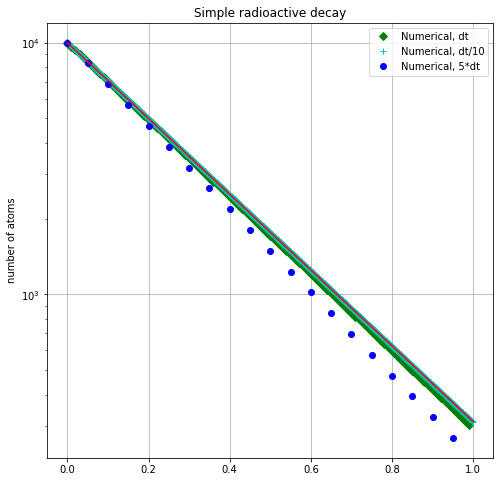

In [14]:
pylab.figure(figsize=(8,8))
numerical1 = pylab.semilogy(ts1,xs1,'gD',label='Numerical, dt')
numerical2 = pylab.semilogy(ts2,xs2, 'c+',label='Numerical, dt/10')
numerical3 = pylab.semilogy(ts3,xs3, 'bo',label='Numerical, 5*dt')

t  = numpy.arange(t0,t1,deltat/100)
analytical = pylab.semilogy(t, radioactive.analytical(natoms,t), 
                             color='r')
# Annotate the graph
pylab.title('Simple radioactive decay')
pylab.ylabel('number of atoms')
pylab.legend()
pylab.grid(True)

Text(0.5,0,'time (s)')

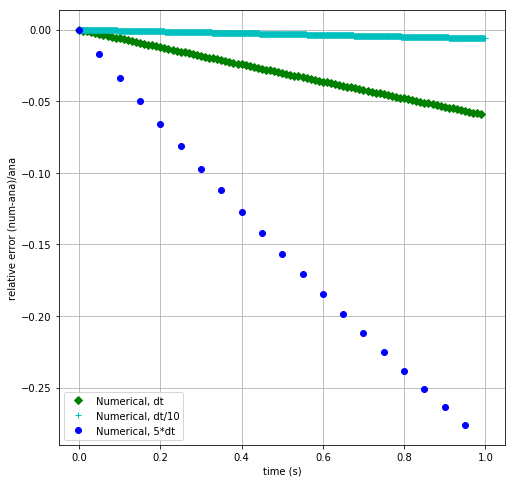

In [15]:
pylab.figure(figsize=(8,8))
pylab.ylabel('relative error (num-ana)/ana')

errors1 = radioactive.relative_error(result1,t0,t1)
ts1, xs1 = zip(*errors1)

errors2 = radioactive.relative_error(result2,t0,t1)
ts2, xs2 = zip(*errors2)

errors3 = radioactive.relative_error(result3,t0,t1)
ts3, xs3 = zip(*errors3)

error1 = pylab.plot(ts1,xs1,'gD',label='Numerical, dt' )
error2 = pylab.plot(ts2,xs2, 'c+', label='Numerical, dt/10')
error3 = pylab.plot(ts3,xs3, 'bo', label='Numerical, 5*dt')
pylab.legend()
pylab.grid(True)
pylab.xlabel('time (s)')


## Radioactive decay: three isotopes

Generalise the `Radioactive` class to a new class, `RadioactiveABC`, which is able treat a problem with three types of isotopes named A, B and C:

- A decays to B with half-life $h_A$
- B decays to C with half-life $h_B$ 

We start with 1000000 isotopes of type A, and none of types B nor C. 
There is no need to implement an analytical solution. You should be able to re-use ``EulerSolver`` (hint: ``self.x`` can be an array, for example containing $N_A$, $N_B$ and $N_C$).

You will have to add new empty cells below to implement your solution. Begin by creating a markdown cell with the equations you are intending to implement.

Create a plot of the abundances of istopes as a function of time. Execute this cell, and the two hidden cells below, in case the two multiple-choice questions are not visible. Use your code to help you answer the questions.


**5 marks**

In [18]:
# class RadioactiveABC:
#     def __init__(self,hlifeA,hlifeB):
#         self.tauA = hlifeA / numpy.log(2)
#         self.tauB = hlifeB / numpy.log(2)

#     def dx_dt(self,x,t):
#         return numpy.array([
#             -x[0] / self.tauA,
#             -x[1] / self.tauB + x[0]/ self.tauA,
#             x[1]/ self.tauB
#         ])
        


# hlifeA=0.7
# hlifeB=0.9

# rABC = RadioactiveABC(hlifeA,hlifeB)
# solver  = EulerSolver(rABC)

# x0  = numpy.array([1000000,0,0],dtype='f')
# result = solver.solve(x0,0,5,0.01)



# na,nb,nc=solver.coordinateSteps()
# ts=solver.timeSteps()

# pylab.plot(ts,na)
# pylab.plot(ts,nb)
# pylab.plot(ts,nc)


In [13]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="test";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None


class myRadioButton:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        def on_value_change(change):
            s=shelve.open('.choices.shelve')
            key=self.getKey()
            s[key]=change['new']
            s.close()

        self.widget=widgets.RadioButtons(
            options=self.options,
            value=get_last_value(self.getKey()),
            description=self.description,
            disabled=False
        )
        self.widget.observe(on_value_change, names='value')

        return self.widget
    def getKey(self):
        return '{0}_{1}'.format(assessmentName,self.name)
        
        
def on_value_change(change):
                s=shelve.open('.choices.shelve')
                key='{0}_{1}_{2}'.format(assessmentName,self.name,i)
                s[key]=change['new']
                s.close()

def make_value_change_fn(assessmentName,name,i):
        def fn(change):
            s=shelve.open('.choices.shelve')
            key='{0}_{1}_{2}'.format(assessmentName,name,i)
            s[key]=change['new']
            s.close()
        return fn

class myCheckBoxSet:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        keys=['{0}_{1}_{2}'.format(assessmentName,self.name,i) for i in range(len(self.options))]    
        self.widgets=[ widgets.Checkbox(value=get_last_value(key),
    description=o,
    disabled=False
        ) for key,o in zip(keys,self.options)]
        
        txt=widgets.HTMLMath(
            value=self.description,
            placeholder='',
            description='',
        )

        
        self.widget=VBox([txt]+self.widgets)
        for i,w in enumerate(self.widgets):
            w.observe(make_value_change_fn(assessmentName,self.name,i), names='value')

        return self.widget

In [14]:
mcbs1=myCheckBoxSet('radioactiveABC1','We consider $h_A=0.3$ and $h_B=0.2$. Which of the nuclei type has the most nuclei at time $t=1$ ?',[
    'type A',
    'type B',
    'type C']
)
mcbs1.getWidget()

In [15]:
mcbs2=myCheckBoxSet('radioactiveABC2',
                   'We consider $h_A=0.7$ and $h_B=0.9$. Which of the nuclei type number is increasing at time $t=0.5$?',[
    'type A',
    'type B',
    'type C']
)
mcbs2.getWidget()



In [29]:
natoms = 1000000
hlifeA  = 0.3   # Half-life of the element
hlifeB  = 0.2   # Half-life of the element
t0     = 0.0   # Initial time
t1     = 2.0   # Final time of simulation
deltat = 0.01   # Size of timestep

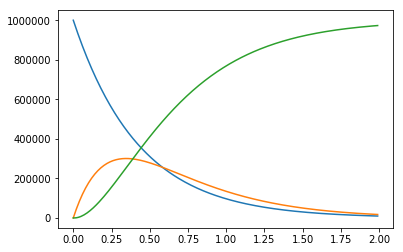

In [30]:
class RadioactiveABC:
    def __init__(self,hlifeA,hlifeB):
        self.tauA = hlifeA / numpy.log(2)
        self.tauB = hlifeB / numpy.log(2)

    def dx_dt(self,x,t):
        return numpy.array([
            -x[0] / self.tauA,
            -x[1] / self.tauB + x[0]/ self.tauA,
            x[1]/ self.tauB
        ])
        



rABC = RadioactiveABC(hlifeA,hlifeB)
solver  = EulerSolver(rABC)

x0  = numpy.array([natoms,0,0],dtype='f')
result = solver.solve(x0,t0,t1,deltat)



na,nb,nc=solver.coordinateSteps()
ts=solver.timeSteps()

pylab.plot(ts,na)
pylab.plot(ts,nb)
pylab.plot(ts,nc)

## Playground

Below are some more exercises you may want to try. They are not graded


The number of individuals in a population, $N$, changes because of births and deaths. Suppose this is described as


$\frac{{\rm d}N}{{\rm d}t} = a N - b N^2$

where $a=10$ and $b=0.01$. Starting from $N=100$, evaluate the evolution of $N$. First analyse the expected behaviour, for example, is there an equilibrium population number? And what is the time-scale fo reaching this equilibrium.






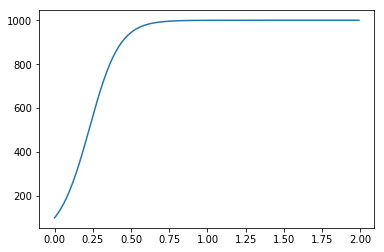

In [60]:
class populationsChange:
    def __init__(self,a,b):
        self.a = a
        self.b = b

    def dx_dt(self,x,t):
        return (self.a * x - self.b * x ** 2)
    
a = 10
b = 0.01
N = 100
t0 = 0
t1 = 2
deltat = 0.01

rABC = populationsChange(a, b)
solver  = EulerSolver(rABC)
x0=numpy.array([100], dtype = 'f')
result = solver.solve(x0, t0, t1, deltat)

nx, ts = zip(*result)

pylab.plot(nx, ts)

In [ ]:
Yes, maybe after 0.65-0.75 can the population reaching this equilibrium.